/home/wojtek/studia/naive-bayes-classifier/lib/python3.12/site-packages/sklearn/metrics/_plot/roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


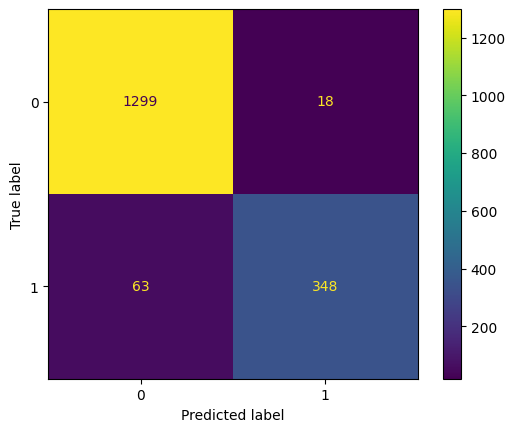

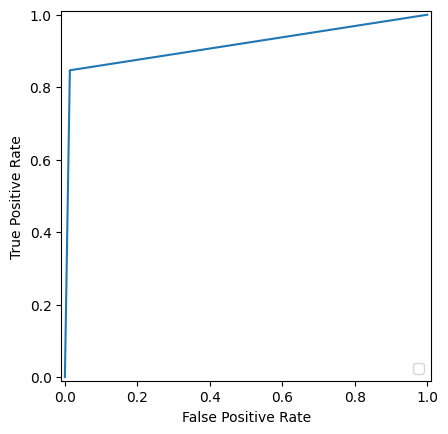

In [10]:
import pandas as pd
import pickle
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_curve


with open('X.pkl', 'rb') as file:
    X = pickle.load(file)

with open('Y.pkl', 'rb') as file:
    y = pickle.load(file)


X_train, X_test = X[:4000], X[4000:]
y_train, y_test = y[:4000], y[4000:]


classificator = GaussianNB()

classificator.fit(X_train.toarray(), y_train)

predict = classificator.predict(X_test.toarray())

# accuracy_score(y_test, predict)


cm = confusion_matrix(y_test, predict)
cm_display = ConfusionMatrixDisplay(cm).plot()

y_prob = classificator.predict_proba(X_test.toarray())[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [12]:
X_train

<4000x37158 sparse matrix of type '<class 'numpy.int64'>'
	with 379003 stored elements in Compressed Sparse Row format>